This notebook exposes few code snippets to plot contours

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


We are going to do the same as we did in the heatmap notebook. First create a random dataset with a few classes and two features (to visualize samples in the 2d plane). Then create a classifier and draw the decission bounds with contours

In [2]:
num_classes = 3
X, y = make_classification(n_samples=500, n_features=2,
                           n_classes=num_classes, n_informative=2, n_redundant=0, n_repeated=0,
                          class_sep=0.95, n_clusters_per_class=1)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, stratify=y)

In [4]:
model = SVC(C=1.25, gamma='scale', probability=True)
model.fit(X_train, y_train)

SVC(C=1.25, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [5]:
y_test_pred = model.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.99

Create scatter plot to show samples using their two features.

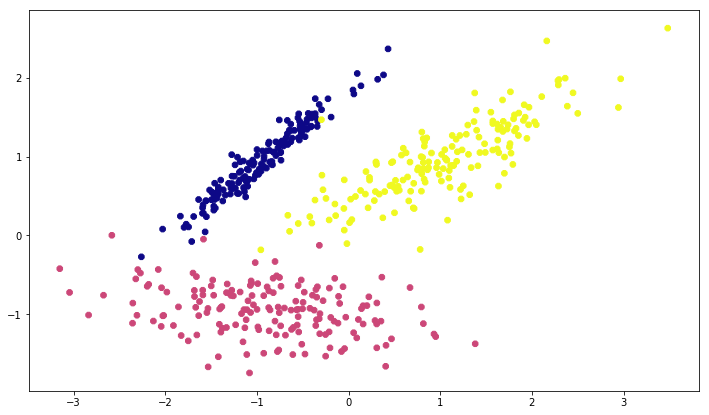

In [6]:
plt.figure(figsize=(12, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, marker='8', s=36, cmap='plasma');

Now do the same but also draw the classification boundaries

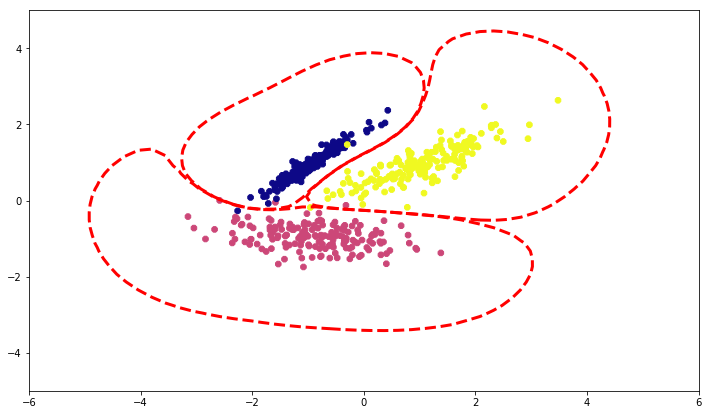

In [7]:
plt.figure(figsize=(12, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, marker='8', s=36, cmap='plasma');


xx, yy = np.meshgrid(np.linspace(-6, 6, 50), np.linspace(-5, 5, 50), indexing='xy')
z = model.predict_proba(np.stack([xx.flatten(), yy.flatten()], axis=1))
z = z.reshape([50, 50, -1], order='C')

for i in range(0, num_classes):
    plt.contour(xx, yy, z[:, :, i], levels=1, linewidths=3, colors='red', linestyles='--')

Another visualization. One plot for each class indicating how well the classiffier distinguish samples of the given class

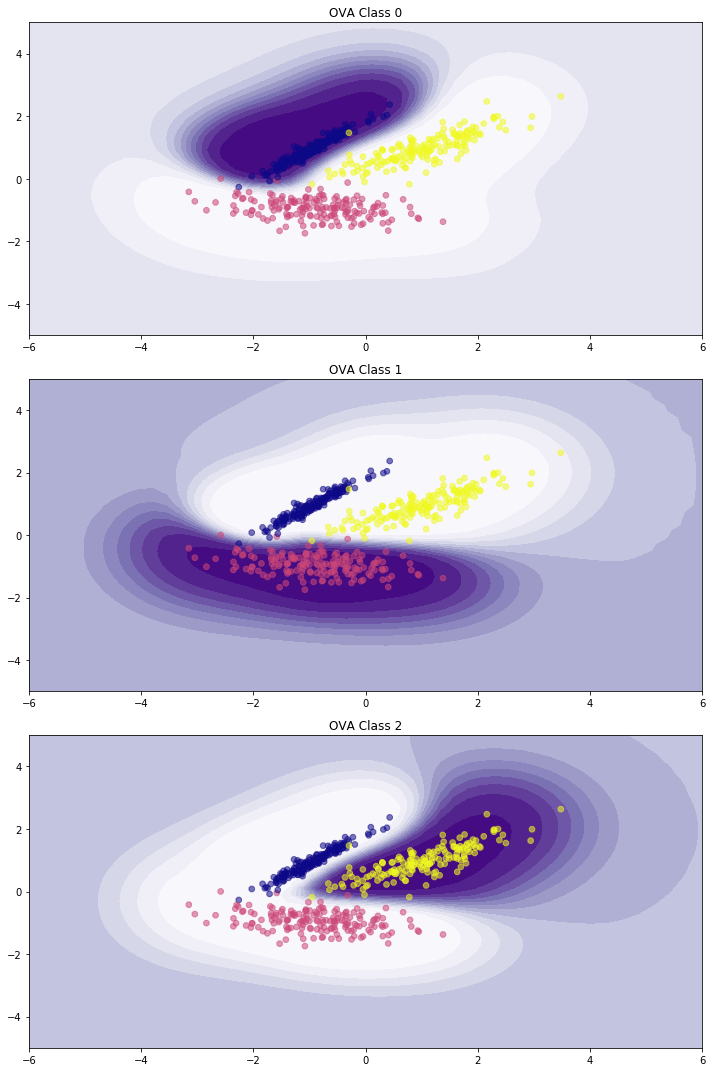

In [8]:
fig, ax = plt.subplots(num_classes, 1, figsize=(10, 5*num_classes))

for i in range(0, num_classes):
    plt.sca(ax[i])
    plt.contourf(xx, yy, z[:, :, i], levels=15, cmap='Purples')
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='8', s=36, cmap='plasma', alpha=0.55);
    plt.title('OVA Class {}'.format(i))

plt.tight_layout()

Instead of plotting the classification boundary for each target class, we can display the level of 'certainty' on the predictions. The darker are the image, the more confident are the model predictions

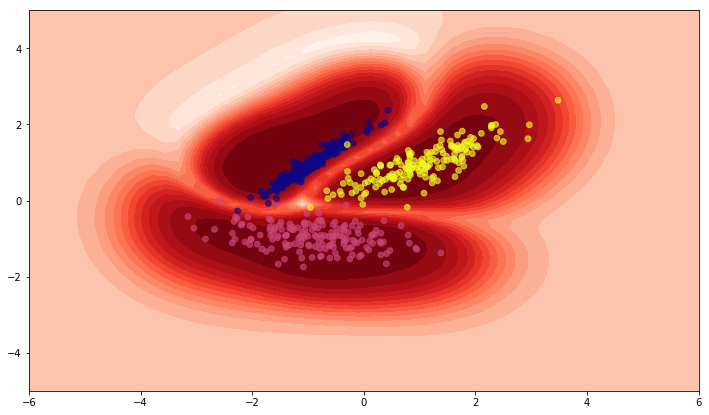

In [9]:
plt.figure(figsize=(12, 7))
ze = z.std(axis=2)
plt.contourf(xx, yy, ze, levels=15, cmap='Reds')
plt.scatter(X[:, 0], X[:, 1], c=y, marker='8', s=36, cmap='plasma', alpha=0.65);